<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-1">Exercise 1</a></span></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-2">Exercise 2</a></span></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-3">Exercise 3</a></span></li></ul></div>

# Solution Practice Sheet 3

##  Exercise 1 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("results.csv")

In [3]:
df.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False


Adding a column win/lose/tie column: We first create a list of conditions 

In [4]:
x=df['home_score']-df['away_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]

In [5]:
values= ['win','lose','draw']

In [6]:
import numpy as np

In [7]:
df['result'] = np.select(conditions, values)

In [8]:
df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,lose


In [9]:
df['result'].value_counts()

lose    21009
win     12224
draw     9955
Name: result, dtype: int64

In [10]:
df['result'].value_counts(normalize=True)

lose    0.486455
win     0.283042
draw    0.230504
Name: result, dtype: float64

In [11]:
x=df['result'].value_counts()

In [12]:
x=np.array(x)

In [13]:
x

array([21009, 12224,  9955], dtype=int64)

In [14]:
N=x.sum()

In [15]:
N

43188

In [16]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [17]:
CI_win=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))

In [18]:
CI_win

(0.27879305599044235, 0.28729011526083115)

In [19]:
CI_lose=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))

In [20]:
CI_lose

(0.481740705905987, 0.49116843552218753)

In [21]:
CI_draw=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))

In [22]:
CI_draw

(0.2265318471530234, 0.23447584016752862)

In [23]:
df['country'].unique()

array(['Scotland', 'England', 'Wales', 'Ireland', 'United States',
       'Uruguay', 'Austria', 'Hungary', 'Argentina', 'Belgium', 'France',
       'Netherlands', 'Bohemia', 'Switzerland', 'Sweden', 'Germany',
       'Italy', 'Chile', 'Norway', 'Finland', 'Luxembourg', 'Russia',
       'Denmark', 'Spain', 'Japan', 'Brazil', 'Paraguay', 'China PR',
       'Canada', 'Estonia', 'Guatemala', 'Czechoslovakia', 'Poland',
       'Yugoslavia', 'New Zealand', 'Romania', 'Latvia', 'Portugal',
       'Northern Ireland', 'Australia', 'Lithuania', 'Turkey', 'Mexico',
       'Aruba', 'Soviet Union', 'Haiti', 'Philippines', 'Bulgaria',
       'Jamaica', 'Kenya', 'Czech Republic', 'Peru', 'Honduras',
       'British Guyana', 'Uganda', 'El Salvador', 'Barbados',
       'Irish Free State', 'Trinidad and Tobago', 'Greece', 'Curaçao',
       'Egypt', 'Dominica', 'Guadeloupe', 'Palestine',
       'Netherlands Guyana', 'French Guiana', 'Cuba', 'Colombia',
       'Saint Kitts and Nevis', 'Éire', 'Panama', 'B

In [24]:
dfegy=df[df['country']=='Egypt']

In [25]:
dfegy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,lose
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,lose
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,lose


Create a variable type of the match  `friendly/No friendly` and `home/away` match

In [26]:
conditions = [
    (dfegy['tournament']=='Friendly'),
    (dfegy['tournament']!='Friendly')
    ]

In [27]:
values=['Friendly','Official']

In [28]:
dfegy['typematch'] = np.select(conditions, values)

C:\Users\dhafe\AppData\Local\Temp/ipykernel_24812/2597929672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['typematch'] = np.select(conditions, values)


In [29]:
dfegy['typematch'].value_counts()

Official    226
Friendly    181
Name: typematch, dtype: int64

Comparing the probability of win/lose/draw by type of match 

In [30]:
x=pd.crosstab(dfegy['typematch'],dfegy['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,37,99,45,181
Official,40,139,47,226
All,77,238,92,407


In [31]:
x=np.array(x)
x

array([[ 37,  99,  45, 181],
       [ 40, 139,  47, 226],
       [ 77, 238,  92, 407]], dtype=int64)

In [32]:
CI_egywin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_egywin_friendly
                                                          

(0.1856528084886489, 0.3115847605721246)

In [33]:
CI_egywin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_egywin_official

(0.1550517855722795, 0.2608774179675435)

Plotting the Confidence intervals 

In [34]:
ci_egywin = {}
ci_egywin['Typematch'] = ['Friendly','Official']
ci_egywin['lb'] = [CI_egywin_friendly[0],CI_egywin_official[0]]
ci_egywin['ub'] = [CI_egywin_friendly[1],CI_egywin_official[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,Typematch,lb,ub
0,Friendly,0.185653,0.311585
1,Official,0.155052,0.260877


([<matplotlib.axis.YTick at 0x1d7d5b889a0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

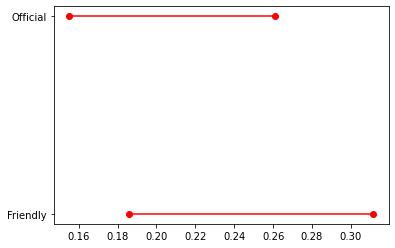

In [35]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Let's now check out the impact of fans on the match results. We will compare the probability of winning between home matches and away matches.

In [36]:
dfegy['home']=(dfegy['home_team']=='Egypt')

C:\Users\dhafe\AppData\Local\Temp/ipykernel_24812/2175071764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['home']=(dfegy['home_team']=='Egypt')


In [37]:
dfegy['home'].value_counts()

True     258
False    149
Name: home, dtype: int64

In [38]:
x=pd.crosstab(dfegy['home'],dfegy['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,33,67,49,149
True,44,171,43,258
All,77,238,92,407


In [39]:
dfegy.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,typematch,home
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw,Friendly,True
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,lose,Official,True
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,lose,Friendly,True
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw,Friendly,True


In [40]:
x=np.array(x)
x

array([[ 33,  67,  49, 149],
       [ 44, 171,  43, 258],
       [ 77, 238,  92, 407]], dtype=int64)

In [41]:
CI_egywin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_egywin_home

(0.12119174183927744, 0.21214159149405587)

In [42]:
CI_egywin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_egywin_away

(0.25342513144684364, 0.40429298935852553)

In [43]:
ci_egywin = {}
ci_egywin['home'] = ['Yes','No']
ci_egywin['lb'] = [CI_egywin_home[0],CI_egywin_away[0]]
ci_egywin['ub'] = [CI_egywin_home[1],CI_egywin_away[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,home,lb,ub
0,Yes,0.121192,0.212142
1,No,0.253425,0.404293


([<matplotlib.axis.YTick at 0x1d7d6339c70>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

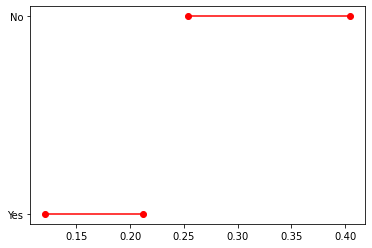

In [44]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

## Exercise 2

In [77]:
import pandas as pd

In [103]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [104]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [105]:
df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua & Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia & Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', 'Côte d\x92Ivoire', 'Cameroon',
       'Congo - Kinshasa', 'Congo - Brazzaville', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', '

In [106]:
from pandas.api.types import CategoricalDtype
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

In [107]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [108]:
import numpy as np

In [109]:
dfegy=df[df['country']=='Egypt']

In [110]:
stats=dfegy.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [111]:
stats

dcases                 
                mean         std size
weekdays                             
Fri       567.161616  428.533849   99
Sat       558.806122  421.803605   98
Sun       545.520408  422.358748   98
Mon       561.846939  442.137949   98
Tue       566.153061  419.125460   98
Wed       561.479592  406.337812   98
Thu       567.683673  410.020004   98

In [112]:
statsm=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})
statsm

dcases                 
              mean         std size
month                              
Jan     899.645161  251.335970   31
Feb     374.409091  288.087868   44
Mar     329.290323  310.292849   62
Apr     504.133333  354.246465   60
May     879.774194  346.475245   62
Jun    1032.633333  454.674216   60
Jul     463.661290  437.595552   62
Aug     145.806452   60.683224   62
Sep     339.033333  225.855584   60
Oct     497.580645  362.321547   62
Nov     598.616667  370.082496   60
Dec     792.709677  300.346870   62

In [53]:
import numpy as np
import scipy.stats 

In [113]:
statsm.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [114]:
ci95_hi = []
ci95_lo = []

In [115]:
for i in statsm.index:
    m, s, n = statsm.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [116]:
ci95_hi

[993.3598571863843,
 463.0084047471138,
 408.7332244407111,
 596.4171621669087,
 968.4807139392825,
 1151.0793353591891,
 575.6969386179874,
 161.3429084204986,
 397.87038622259695,
 590.3442237843955,
 695.0258988600798,
 869.6061543814164]

In [117]:
ci95_lo

[805.9304653942609,
 285.8097770710681,
 249.84742072057924,
 411.8495044997579,
 791.0676731574916,
 914.1873313074777,
 351.6256420271739,
 130.26999480530787,
 280.19628044406977,
 404.8170665381852,
 502.2074344732536,
 715.8132004572933]

In [120]:
statsm['ci95_hi'] = ci95_hi
statsm['ci95_lo'] = ci95_lo
print(statsm)

            dcases                       ci95_hi     ci95_lo
              mean         std size                         
month                                                       
Jan     899.645161  251.335970   31   993.359857  805.930465
Feb     374.409091  288.087868   44   463.008405  285.809777
Mar     329.290323  310.292849   62   408.733224  249.847421
Apr     504.133333  354.246465   60   596.417162  411.849504
May     879.774194  346.475245   62   968.480714  791.067673
Jun    1032.633333  454.674216   60  1151.079335  914.187331
Jul     463.661290  437.595552   62   575.696939  351.625642
Aug     145.806452   60.683224   62   161.342908  130.269995
Sep     339.033333  225.855584   60   397.870386  280.196280
Oct     497.580645  362.321547   62   590.344224  404.817067
Nov     598.616667  370.082496   60   695.025899  502.207434
Dec     792.709677  300.346870   62   869.606154  715.813200


In [121]:
df_ci= pd.DataFrame(statsm)

In [122]:
df_ci

dcases                       ci95_hi     ci95_lo
              mean         std size                         
month                                                       
Jan     899.645161  251.335970   31   993.359857  805.930465
Feb     374.409091  288.087868   44   463.008405  285.809777
Mar     329.290323  310.292849   62   408.733224  249.847421
Apr     504.133333  354.246465   60   596.417162  411.849504
May     879.774194  346.475245   62   968.480714  791.067673
Jun    1032.633333  454.674216   60  1151.079335  914.187331
Jul     463.661290  437.595552   62   575.696939  351.625642
Aug     145.806452   60.683224   62   161.342908  130.269995
Sep     339.033333  225.855584   60   397.870386  280.196280
Oct     497.580645  362.321547   62   590.344224  404.817067
Nov     598.616667  370.082496   60   695.025899  502.207434
Dec     792.709677  300.346870   62   869.606154  715.813200

In [123]:
df_ci.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [124]:
df_ci['month']=df_ci.index

In [125]:
df_ci

dcases                       ci95_hi     ci95_lo month
              mean         std size                               
month                                                             
Jan     899.645161  251.335970   31   993.359857  805.930465   Jan
Feb     374.409091  288.087868   44   463.008405  285.809777   Feb
Mar     329.290323  310.292849   62   408.733224  249.847421   Mar
Apr     504.133333  354.246465   60   596.417162  411.849504   Apr
May     879.774194  346.475245   62   968.480714  791.067673   May
Jun    1032.633333  454.674216   60  1151.079335  914.187331   Jun
Jul     463.661290  437.595552   62   575.696939  351.625642   Jul
Aug     145.806452   60.683224   62   161.342908  130.269995   Aug
Sep     339.033333  225.855584   60   397.870386  280.196280   Sep
Oct     497.580645  362.321547   62   590.344224  404.817067   Oct
Nov     598.616667  370.082496   60   695.025899  502.207434   Nov
Dec     792.709677  300.346870   62   869.606154  715.813200   Dec

In [126]:
df_ci.columns

MultiIndex([( 'dcases', 'mean'),
            ( 'dcases',  'std'),
            ( 'dcases', 'size'),
            ('ci95_hi',     ''),
            ('ci95_lo',     ''),
            (  'month',     '')],
           )

In [127]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x1d7dbb1c1c0>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

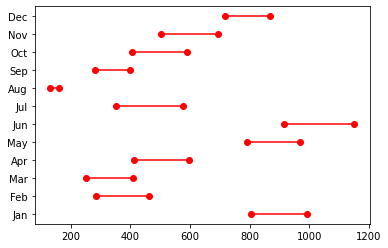

In [129]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['month']))


## Exercise 3

In [68]:
import numpy as np
from scipy.stats import norm,t
import pandas as pd

In [69]:
yM, sM, nM = 4.5,0.45,55

In [70]:
yF, sF, nF = 3.1,0.33,65

In [71]:
ciM=scipy.stats.t.interval(.95, nM-1, yM,np.sqrt(sM)/np.sqrt(nM-1))

In [72]:
ciM

(4.316980398278775, 4.683019601721225)

In [73]:
ciF=scipy.stats.t.interval(.95, nF-1, yF,np.sqrt(sF)/np.sqrt(nF-1))

In [74]:
ciF

(2.956548960673736, 3.2434510393262643)

In [75]:
ci = {}
ci['Gender'] = ['Male','Female']
ci['lb'] = [ciM[0],ciF[0]]
ci['ub'] = [ciM[1],ciF[1]]
df_ci= pd.DataFrame(ci)

([<matplotlib.axis.YTick at 0x1d7d4edccd0>,
 [Text(0, 0, 'Male'), Text(0, 1, 'Female')])

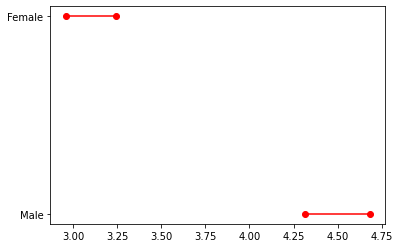

In [76]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Gender']))